In [1]:
import pandas as pd
import re

df = pd.read_csv('housing.csv')
df.info()
y = df['median_house_value']
X = df.drop(columns=['median_house_value','total_rooms','ocean_proximity','total_bedrooms','population','median_income','buy'])

print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           506 non-null    float64
 1   latitude            506 non-null    float64
 2   housing_median_age  506 non-null    float64
 3   total_rooms         506 non-null    int64  
 4   total_bedrooms      506 non-null    float64
 5   population          506 non-null    float64
 6   households          506 non-null    float64
 7   median_income       506 non-null    float64
 8   ocean_proximity     506 non-null    int64  
 9   medh                506 non-null    float64
 10  sell                506 non-null    float64
 11  buy                 506 non-null    float64
 12  change              506 non-null    float64
 13  median_house_value  506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entri

In [2]:
from sklearn.cluster import KMeans

models = {}
labels = {}

n_clusters = 4

for col in X.columns:
  model = KMeans(n_clusters=n_clusters)
  model.fit(X[[col]])
  centers = model.cluster_centers_.tolist()
  centers = sum(centers, [])
  centers = sorted(centers)
  models[col] = centers
  labels[col] = model.labels_

models

{'longitude': [0.7803676513317197,
  11.222867272727271,
  31.658400000000007,
  76.81036666666665],
 'latitude': [4.085620730620576e-14,
  22.86184210526315,
  48.3695652173913,
  82.85714285714288],
 'housing_median_age': [4.088494623655912,
  9.0863025210084,
  18.08551724137932,
  23.948148148148146],
 'households': [18.721875000000004,
  41.852941176470594,
  68.91456310679612,
  93.39029535864978],
 'medh': [224.43589743589737,
  298.50520833333314,
  406.8888888888889,
  667.6423357664238],
 'sell': [14.498717948717946,
  16.845205479452055,
  18.514492753623188,
  20.382027649769583],
 'change': [5.628816568047338,
  11.17916129032258,
  17.430472440944882,
  27.358909090909087]}

In [3]:
import pandas as pd

X_clust = pd.DataFrame(data=labels)
X_clust.head() 

,longitude,latitude,housing_median_age,households,medh,sell,change
0,0,2,0,2,0,0,1
1,0,1,2,2,3,2,3
2,0,1,2,2,3,2,1
3,0,1,0,1,3,2,1
4,0,1,0,1,3,2,1


1.4 Clustering target value

In [4]:
model = KMeans(n_clusters=n_clusters)
model.fit(y.to_frame())
y_centers = model.cluster_centers_.tolist()
y_centers = sum(y_centers, [])
y_centers = sorted(y_centers)
y_labels = model.labels_

y_centers

[12.692857142857145, 21.27653846153846, 31.35909090909091, 47.212500000000006]

In [5]:
!pip install fuzzylogic

from fuzzylogic.functions import S, R, triangular

def make_fuzzy_set(col_min, col_max, center):
  if col_min == center:
    return S(col_min, col_max)
  elif col_max == center:
    return R(col_min, col_max)
  else:
    return triangular(col_min, col_max, c=center)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


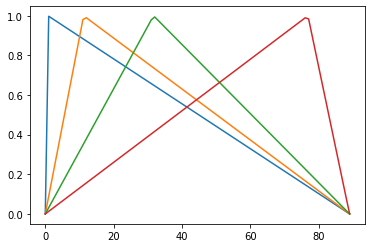

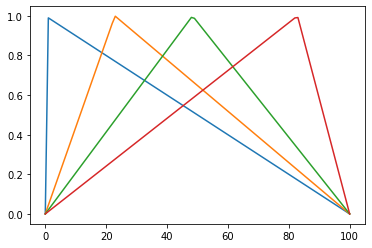

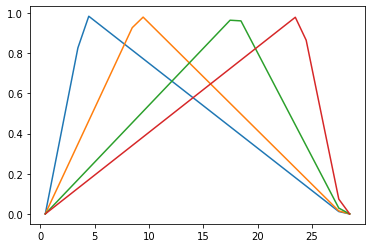

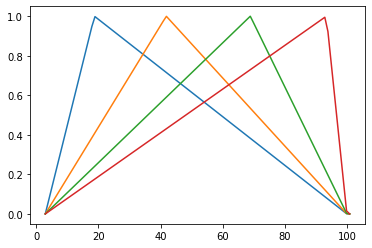

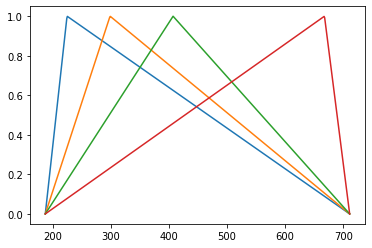

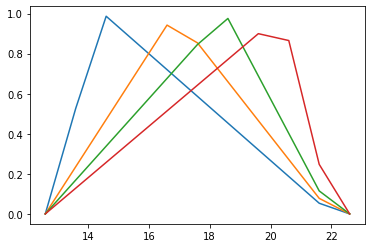

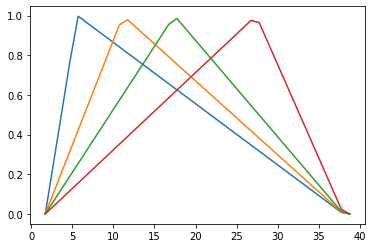

In [6]:
from fuzzylogic.classes import Domain
from matplotlib import pyplot as plt

for key, value in models.items():
  plt.figure()
  X_col = X[key]
  col_min = X_col.min()
  col_max = X_col.max()
  exec(f'{key} = Domain(key, col_min, col_max)')
  for i, rank in enumerate(['very_low', 'low', 'high', 'very_high']):
     exec(f'{key}.{rank} = make_fuzzy_set(col_min, col_max, value[{i}])')
     exec(f'{key}.{rank}.plot()')

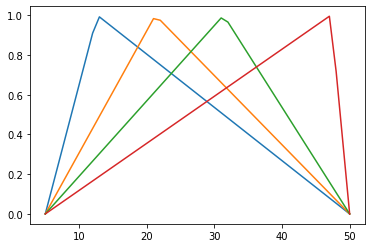

In [7]:
y_min = y.min()
y_max = y.max()
exec(f'{y.name} = Domain(y.name, y_min, y_max)')
for i, rank in enumerate(['very_low', 'low', 'high', 'very_high']):
  exec(f'{y.name}.{rank} = make_fuzzy_set(y_min, y_max, y_centers[{i}])')
  exec(f'{y.name}.{rank}.plot()')


In [8]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_clust, y_labels)

model.feature_log_prob_

array([[-3.93909509, -1.97019542, -2.00993575, -1.96695393, -2.11304655,
        -1.66960994, -1.35465884],
       [-2.99071973, -1.73795676, -2.89540955, -1.85931762, -1.53210471,
        -1.82756892, -1.68238691],
       [-4.59222967, -1.71785826, -3.40264561, -1.5964974 , -1.67060537,
        -1.56140608, -1.73411878],
       [-1.57482512, -1.97514883, -1.72468947, -3.58458674, -1.95233415,
        -2.03049893, -1.74281685]])

In [9]:
from itertools import product

X_comb = []
for comb in product(*len(X_clust.columns)*[[0, 1, 2, 3]]):  # n_cluster
  X_comb.append(comb)
X_comb = pd.DataFrame(X_comb, columns=X_clust.columns)

X_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16384 entries, 0 to 16383
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   longitude           16384 non-null  int64
 1   latitude            16384 non-null  int64
 2   housing_median_age  16384 non-null  int64
 3   households          16384 non-null  int64
 4   medh                16384 non-null  int64
 5   sell                16384 non-null  int64
 6   change              16384 non-null  int64
dtypes: int64(7)
memory usage: 896.1 KB


In [10]:
preds = model.predict(X_comb)
df = X_comb.copy()
df['pred'] = preds
df.to_csv('data_with_labels.csv')

preds[:10]
print(set(preds))

{0, 1, 2, 3}


In [11]:
map = {0: 'very_low',
      1: 'low',
      2: 'high',
      3: 'very_high'}

In [12]:
from fuzzylogic.classes import Rule

rules = []
for i, row in X_comb.iterrows():
  cond = []
  for col in X_comb.columns:
    cond.append('.'.join([col, map[row[col]]]))
  cond = ', '.join(cond)
  cons = '.'.join([y.name, map[preds[i]]])
  rules.append(f'({cond}): {cons}')

rules = eval('Rule({' + ',\n'.join(rules) + ',})')

rules

In [13]:
X_test = X[:200]
values = []
for i, row in X_test.iterrows():
  value = {}
  for col in X_test.columns:
    value[eval(col)] = row[col]
  values.append(value)

values[:5]

[{Domain('longitude', 0.00632, 88.9762, res=1, sets={'very_low': Set(<function triangular.<locals>.f at 0x7f2a62fa0a60>), 'low': Set(<function triangular.<locals>.f at 0x7f2a62f01160>), 'high': Set(<function triangular.<locals>.f at 0x7f2a62f018b0>), 'very_high': Set(<function triangular.<locals>.f at 0x7f2a62f090d0>)}): 0.00632,
  Domain('latitude', 0.0, 100.0, res=1, sets={'very_low': Set(<function triangular.<locals>.f at 0x7f2a62f09d30>), 'low': Set(<function triangular.<locals>.f at 0x7f2a62ec34c0>), 'high': Set(<function triangular.<locals>.f at 0x7f2a62ec3c10>), 'very_high': Set(<function triangular.<locals>.f at 0x7f2a62ec73a0>)}): 18.0,
  Domain('housing_median_age', 0.46, 27.74, res=1, sets={'very_low': Set(<function triangular.<locals>.f at 0x7f2a62ecb0d0>), 'low': Set(<function triangular.<locals>.f at 0x7f2a62e7c700>), 'high': Set(<function triangular.<locals>.f at 0x7f2a62e7ce50>), 'very_high': Set(<function triangular.<locals>.f at 0x7f2a62e825e0>)}): 2.31,
  Domain('hou

In [14]:
preds = [rules(x) for x in values]

preds[:10]

[None,
 None,
 None,
 None,
 None,
 None,
 23.64085480563481,
 23.9844237064956,
 28.752361274967857,
 23.664243007004526]

In [15]:
y_test = y[:200]
df_test = pd.DataFrame(data = {'y_pred': preds, 'y_true': y_test})
df_test = df_test.dropna()

df_test

,y_pred,y_true
6,23.640855,22.9
7,23.984424,27.1
8,28.752361,16.5
9,23.664243,18.9
10,24.020199,15.0
11,23.640855,18.9
12,23.640855,21.7
39,23.640855,30.8
40,24.064868,34.9
50,23.640855,19.7


In [16]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df_test['y_true'], df_test['y_pred'])

39.65033480138766

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
preds = model.predict(X_test)

mean_squared_error(y_test, preds)

26.126730594282854